### STAT 207 Lab 4: Distributions and random variables

Due: Tuesday, September 22, 23:59:59 CST

This lab consists of 3 main parts. You may add as many cells as you need in order to do the excercises. To add cells use the "Insert" tab from the menu bar above and select "insert cell above" or "insert cell below". In some cases, you will need to import certain python libraries before doing calculations.

Please use Markdown cells above or below your code cells to explain your results. Make sure graders know that you understand what your code is doing.

**Note: not every problem in this lab requires Python calculation. In some cases you can just work it out and type in your solution.**



### Part 1: Bernoulli random variables (8 pts)

**a) (2 pts) A Bernoulli random variable can only take two possible values: 0 or 1. Suppose $X$ is a Bernoulli random variable and $P(X=1)=0.7$. What does $P(X=0)$ equal? (answer only).**

$$
P(X=0)=1-P(X=1)= 1-0.7= 0.3
$$

**b) (2 pts) The population mean $\mu$ of a discrete random variable $X$ with possible values $x_1, x_2, \ldots$ is given by**

$$
\mu = E[X] = x_1 P(X=x_1) + x_2 P(X=x_2) + \ldots 
$$

**where the sum ranges over all possible values $x_i$ for $X$. If $X$ is a Bernoulli random variable with $P(X=1)= 0.7$, find  $E[X]$ by hand (i.e. not using Python functions). Show how you calculated it.**


$$\mu= 1P(X=1) + 0P(X=0)= 1(0.7) + 0(0.3)= 0.7$$

**c) (2 pts) The variance of a random variable with mean $\mu$ is given by**

$$
\sigma^2 = Var(X) = E[(X-\mu)^2] = (x_1-\mu)^2 \cdot P(X=x_1) + (x_2-\mu)^2 \cdot P(X=x_2) + \ldots 
$$

**If $X$ is a Bernoulli random variable and $P(X=1)=0.7$, compute the variance by hand. (show work)**

$$
\sigma^2= (1-0.7)^2\cdot P(x=1) + (0-0.7)^2\cdot P(X=0)= 0.3^2\cdot 0.7 + 0.7^2\cdot 0.3=0.21
$$

**d) (2 pts) 
We discussed in class that for *any* Bernoulli random variable $X$ with $P(X=1) = p, P(X=0)=1-p$, where $0 <p<1$, it is the case that the population mean and variance for $X$ are given by $\mu=p$ and $\sigma^2 = p(1-p)$. Prove this.**

* Hint: Go through the motions of how you calculated $\mu$ and $\sigma^2$ above, but now use "$p$" instead of that "0.7" you were using above. 
* Hint: Then try to simplify the expressions into the given forms, showing how.

$$
E[X] = 0*(1-p) + 1*p = p
$$

$$
E[(X-p)^2] = (0-p)^2 (1-p) + (1-p)^2 p = p(1-p)(p + 1 - p) = p(1-p)
$$

### Part 2: Normal Distribution (8 pts)

The normal family of distributions are used widely in practice, both because of the Central Limit Theorem for the large sample distribution of averages, and because many types of measurements appear to follow a normal distribution to a reasonable approximation. The SciPy.stats library provides the 'norm' function with methods for computing the probability density function (.pdf), cumulative distribution function (.cdf), percent point function (.ppf - like the quantile function for data), random variate generation (.rvs), and other parameters (.mean, .std, .median etc). Please study the documentation here:
[scipy.stats.norm](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm)

Let's let 'norm' help us experiment with the normal distribution. 

Recall in class, we discussed some of the population parameter functions that we can use on various scipy.stat distributions (like 'norm') to calculate things like: 

* the .cdf() of the distribution, 

* the .median() of the distribution,

* a given percentile (ie. .ppf() of the distribution,

* the .mean() of the distribution,

* the .var() (ie. variance) of the distribution, and

* the .std() (ie. standard deviation) of the distribution.

Most random variable distributions require additional information (ie parameters) to decribe the distribution. For instance, in the normal distribution we need to know the mean $\mu$ and standard deviation $\sigma$ ahead of time to describe the distribution.  

So most distributions from scipy.stats (like 'norm'), need additional parameters specified inside these population parameter functions listed above.

So specifically inside your norm.POPUPLATION_PARAMETER_FUNCTION(), you need to write 'loc=YOUR_MEAN' and 'scale=YOUR_STANDARD_DEVIATION' (For instance, norm.var(loc=3,scale=22) will return the variance of a normal distribution with mean 3 and standard deviation 22.)

In [1]:
from scipy.stats import norm
import pandas as pd

**a) (2 pts) Use the scipy.stats .mean( ) and .std( ) methods to show that the distribution implemented by the 'norm' function with loc=4 and scale=1 has mean 4 and standard devation 1.**

In [2]:
#mean
norm.mean(loc=4,scale=1)

4.0

In [3]:
# standard deviation
norm.std(loc=4,scale=1)

1.0

**b) (2 pts) Suppose the random variable $X$ is normally distributed with mean 6 and standard deviation 2. Compute $P(X \le 8)$.**

In [4]:
norm.cdf(8, loc=6, scale=2)

0.8413447460685429

**c) (2 pts) If $X$ normally distributed with mean 6 and standard deviation 2, compute $P(4 \lt X \le 8)$**

In [5]:
norm.cdf(8, loc=6, scale=2)-norm.cdf(4, loc=6, scale=2)

0.6826894921370859

**e) (2 pts) If $X$ is normal with mean 6 and standard deviation 2, compute the 75th percentile of its distribution.**

Using the z-score table, 75th percentile is at z=0.675, Therefore:
$$
X=\mu + \sigma \cdot z = 6 + 2\cdot 0.675=7.35
$$



In [6]:
norm.ppf(0.75,loc=6, scale=2)

7.348979500392163

### Part 3: Sampling from the Normal distribution (9 pts)

If $X_1, X_2, \ldots, X_n$ is an independent random sample from a distribution with mean $\mu$ and standard deviation $\sigma$, then the sample mean

$$
\bar{X} = {X_1+X_2+\cdots+X_n\over n}
$$

has the same mean as the original variable, i.e. $E[\bar{X}]=\mu$, but it has reduced standard devation, according to the square root rule:

$$
SD[\bar{X}] = {\sigma\over \sqrt{n}}.
$$

Furthermore, averages of normal random variables are also normally distributed.

**a) (2 pts) Use norm.rvs( ) method to generate a random sample of 20 observations from the normal distribution with mean = 11 and standard devation =3. Save the values in a pandas Series or data frame and display the results.**

In [7]:
df =norm.rvs(loc=11, scale=3, size=20)
df=pd.Series(df)
df

0     10.327357
1      6.285696
2      7.014027
3     13.740668
4     10.082955
5     11.632633
6     11.691084
7      8.124739
8     14.616192
9     10.947739
10    16.210373
11     4.845649
12     9.514763
13    14.354341
14    11.962922
15    14.420162
16     9.515931
17    12.106727
18     7.985944
19     8.894389
dtype: float64

**b) (1 pt) Compute the sample mean and sample standard deviation for the numbers you generated in part a). Are they close to 11 and 3 respectively?**

In [8]:
df.mean()

10.713714599947

In [9]:
df.std()

3.039688123257732

Yes, pretty close to the populatoin values.

**c) (1 pts) Make a density histogram of the values you got in a)** 

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

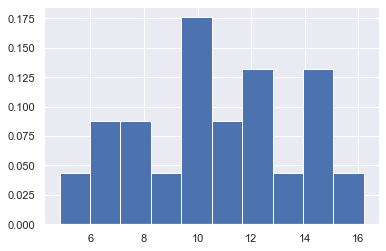

In [11]:
df.hist(density=True)
plt.show()

**d) (3 pts) Write a loop to repeat the following process 50 times:  1) Draw a sample of 20 observations from the normal distribution with mean=11 and standard devation =3. 2) Compute the sample mean for each sample. Store your 50 sample means in a data frame or Series and display them.**

In [12]:
smean=[]
for i in range (50):
    df =norm.rvs(loc=11, scale=3, size=20)
    smean.append(df.mean())
smean=pd.Series(smean)
smean

0     10.204606
1      9.906270
2     12.025393
3     11.149225
4      9.605584
5     10.696234
6      9.950344
7     10.840883
8     10.704998
9     10.096164
10    10.517215
11    10.533421
12     9.859922
13    12.121251
14    10.959096
15    10.661847
16    10.451368
17    11.766587
18    11.127584
19    10.864198
20    10.824786
21    10.766430
22    11.250830
23    11.300908
24    10.306133
25    12.303400
26    10.287616
27    10.980458
28    10.942999
29    11.490344
30    10.799897
31    10.284804
32    11.877695
33     9.611385
34    11.792361
35     9.659290
36    10.669984
37    11.330145
38    11.783394
39    10.841112
40     9.702114
41    10.230852
42    11.239066
43    11.370770
44    10.633910
45    10.319606
46    10.814676
47    11.342190
48    10.588629
49    10.420214
dtype: float64

**e) (1 pt) Compute and display the sample mean and standard deviation of the 50 sample means you got in d).** 

In [13]:
smean.mean()

10.796163708704082

In [14]:
smean.std()

0.6756314503858873

**f) (0.5 pt) Using the relationship described in "Part 3" above between a.) the population mean $\mu$ and b.) the mean of sample means (ie $E[\bar{X}]$), what is the mean of many, many sample means (of samples with n=20 observations) from a normal distribution with mean=11 and standard deviation = 3?**

When the distribution of the population is normal, then the distribution of the sample mean is also normal. And the mean of sample means is equal to the mean of population: $E[\bar{X}]=\mu=11$

**g) (0.5 pt) Using the relationship described in "Part 3" above between a.) the population mean $\mu$ and b.) the standard deviation of sample means (ie $SD[\bar{X}]$), what is the standard deviation of many, many sample means (of samples with n=20 observations) from a normal distribution with mean=11 and standard deviation = 3?**

$$
SD[\bar{X}] = {\sigma\over \sqrt{n}}= \frac{3}{\sqrt{20}} \approx 0.671
$$